## STEPS:
1.Remove static unwanted regions from roi

2.Convert bgr to hsv

3.Create upper and lower limits for masks

4.Dilate the mask

5.Use bitwise_and to implement the mask

6.Use contour detection and filter out the small contours using area thresholding

7.Draw rectangles wherever contours are detected and put text



Reading the image, initializing it as an image object, converting color space to RGB for proper interpretation by jupyter notebook

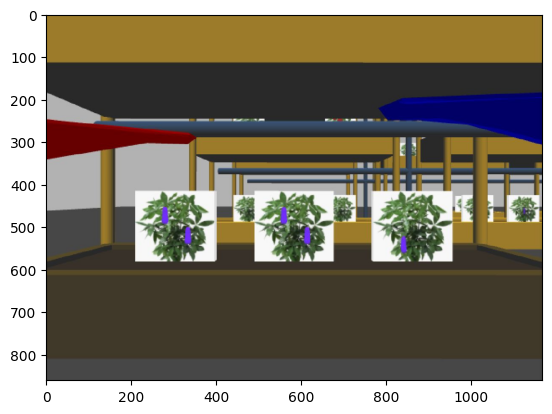

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"D:\workspace\python programs\openCV\application\fruit detection\given_img.jpeg")
roi = img.copy()
roi_rgb = cv.cvtColor(roi,cv.COLOR_BGR2RGB)
final_img = roi_rgb.copy()
plt.imshow(roi_rgb)
plt.show()


Creating 2 polygons that would mask the propellers. the two numpy arrays below are the corner points of the polygons

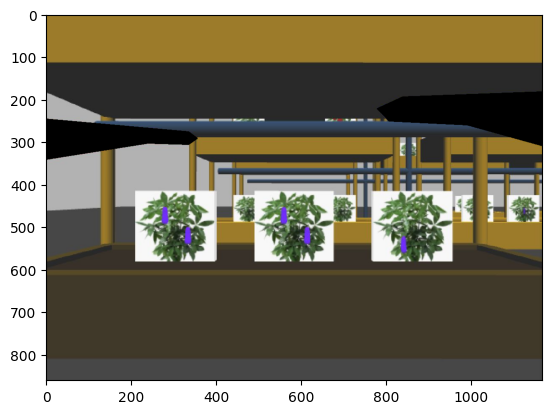

In [7]:


points1 = np.array([[0,247],[335,277],[355,292],[335,306],[240,303],[0,341]],dtype=np.int32)
points1 = points1.reshape((-1, 1, 2))

points2 = np.array([[1168,183],[839,195],[780,222],[808,251],[991,260],[1168,309]],dtype = np.int32)
points2 = points2.reshape((-1, 1, 2))
    
cv.polylines(roi_rgb,[points1],isClosed = True, color = (0,0,0),thickness = 2)
cv.fillPoly(roi_rgb,[points1],color = (0,0,0))

cv.polylines(roi_rgb,[points2],isClosed = True, color = (0,0,0),thickness = 2)
cv.fillPoly(roi_rgb,[points2],color = (0,0,0))

plt.imshow(roi_rgb)
plt.show()

Converting RBG color space to HSV color space for better image processing

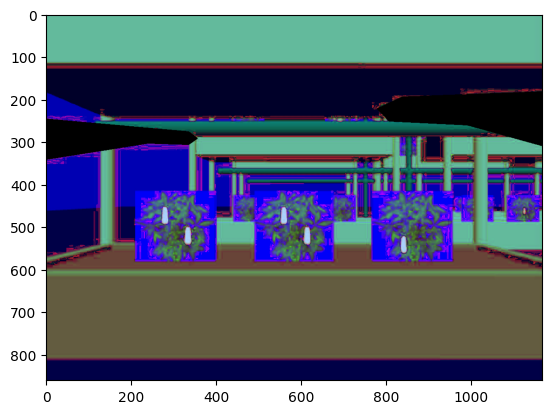

In [8]:
hsv = cv.cvtColor(roi_rgb,cv.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

Setting lower and upper HSV limits for masking out the purple and red color, dilating the mask to enlarge the detected fruits

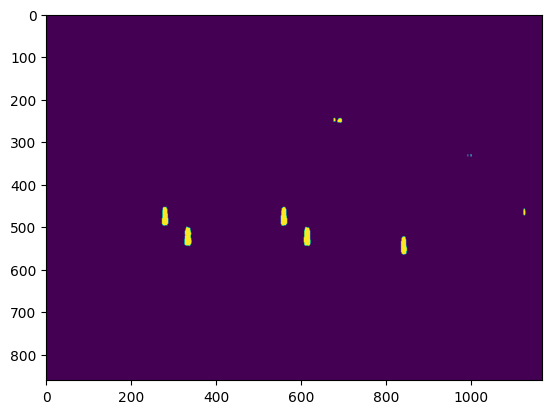

In [9]:
lower = np.array([112,129,0])
upper = np.array([179,255,255])

mask = cv.inRange(hsv,lower,upper)
mask = cv.dilate(mask,(3,3), iterations = 4)
plt.imshow(mask)
plt.show()

Using bitwise and to implement the mask and remove all other unrelated details of the image

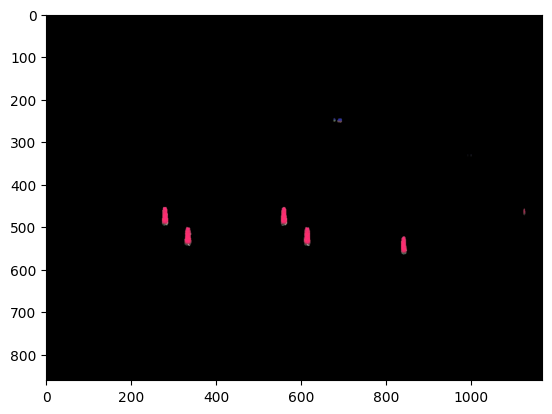

In [10]:
result = cv.bitwise_and(roi,roi,mask = mask)
plt.imshow(result)
plt.show()

Applying contours around the detected fruits whose area is atleast greater than 15 square pixels

In [11]:
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
filtered_contours = [cont for cont in contours if cv.contourArea(cont) > 15]

Telling the program to put rectangles bounding the contours wherever they are detected

In [ ]:
count = 0
for contour in filtered_contours:
    count += 1 
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(final_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv.putText(final_img,f'FRUIT {count}',(x-w-40,y+h+20),cv.FONT_HERSHEY_TRIPLEX,0.6,(0,255,0),thickness = 2)
   
plt.imshow(final_img)
plt.show()
    
cv.waitKey(0)   



NOTE: Did a lot of manual work to calculate the area threshold, dilation iterations, and the lower numpy array for mask. The given values
were finalized after picking the best case scenario by adjusting trackbars and monitoring the image manipulation changes in real time. Creating polygons
to cover the propellers were also located on the image using trackbars.